## Import Pandas and Matplotlib.pyplot using standard aliases
Also run the ipython magic command to display matplotlib graphs within the notebook.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data
The data for this activity is stored in a file called 'causes_of_death.tsv' which is a somewhat morbid dataset from the center for disease control. Note that the file extension .tsv indicates that this data is formatted slightly differently then the standard .csv, the difference being that it has 'tab seperated values' instead of 'comma seperated values'. As such, pass in the optional parameter `delimiter='\t'` into the pd.read_csv() method.

In [34]:
df = pd.read_csv('causes_of_death.tsv', delimiter='\t')
df.head()

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0
3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921,616.2
4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366,448.0


# Practice

# 1) Groupby State and Gender. Sum the values.

In [ ]:
# Your code here

# 2) Groupby State and Gender and Race. Find the average values.

In [ ]:
# Your code here

# 3) Groupby Gender and Race. Find the minimum values.

In [ ]:
# Your code here

## 4) Create a bar chart of the total number of deaths by state.
* Sort your columns in order (ascending or descending are both acceptable).  
* Also make sure to include a title, axes labels and have your graph be an appropriate size.

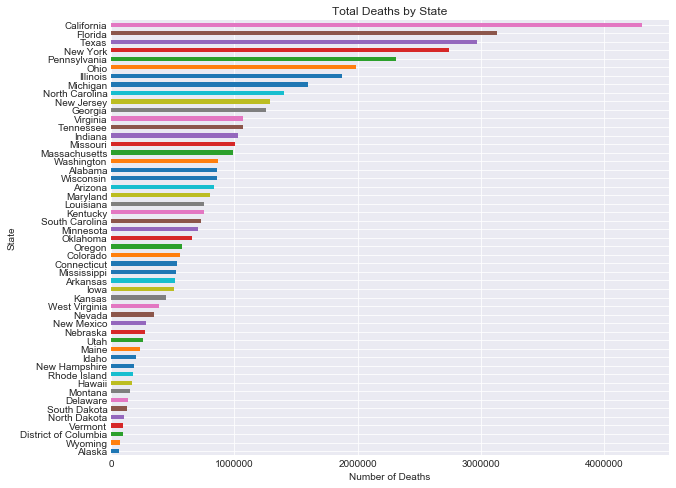

In [40]:
#Your code here
df.groupby('State')['Deaths'].sum().sort_values().plot(kind='barh', figsize=(10,8));
plt.title('Total Deaths by State')
plt.xlabel('Number of Deaths');

## 5) Create a bar chart of the total population by state.
* Sort your columns in order (ascending or descending are both acceptable).  
* Also make sure to include a title, axes labels and have your graph be an appropriate size.

In [ ]:
#Your code here

# Notes on 5: 
## You should notice some odd behavior when you go to sum the population column.
This is because the population column is currently a string.

In [43]:
df.Population.dtype

dtype('O')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 12 columns):
Notes                       0 non-null float64
State                       4115 non-null object
State Code                  4115 non-null int64
Ten-Year Age Groups         4115 non-null object
Ten-Year Age Groups Code    4115 non-null object
Gender                      4115 non-null object
Gender Code                 4115 non-null object
Race                        4115 non-null object
Race Code                   4115 non-null object
Deaths                      4115 non-null int64
Population                  4115 non-null object
Crude Rate                  4115 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 385.9+ KB


In [45]:
df.Population.iloc[:5]

0      3579
1      7443
2    169339
3    347921
4      7366
Name: Population, dtype: object

In [46]:
df.Population.value_counts()[:5]

Not Applicable    75
9192               2
87405              2
6420               2
1512               2
Name: Population, dtype: int64

## 5a) Reformat the population column as an integer
As stands, not all values will be able to be reformated as strings. Apply a cleaning function to the column to first deal with these values.

In [ ]:
#Your code here

## 5b) Now complete your bar chart

In [ ]:
#Your code here

# New Material
Below we will investigate how we can combine the **pivot** method along with the **groupby** method to combine some cool **stacked bar charts**!

In [75]:
# A sample groupby similar to above. 
grouped = df.groupby(['State', 'Gender'])['Deaths', 'Population'].agg(['mean', 'min', 'max', 'std'])
grouped.head()

Deaths                          
                        mean min     max           std
State   Gender                                        
Alabama Female  10753.325000  10  116297  24612.250487
        Male    10503.585366  10   88930  20620.218089
Alaska  Female    679.975000  13    4727   1154.870455
        Male      860.357143  12    5185   1411.777392
Arizona Female   8800.622222  21  133923  25979.871632

In [76]:
grouped.index

MultiIndex(levels=[['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], ['Female', 'Male']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 

In [77]:
# First, reset the index. Notice the subtle difference; State and Gender are now columns rather then the index.
grouped = grouped.reset_index()
grouped.head()

State  Gender        Deaths                          
                            mean min     max           std
0  Alabama  Female  10753.325000  10  116297  24612.250487
1  Alabama    Male  10503.585366  10   88930  20620.218089
2   Alaska  Female    679.975000  13    4727   1154.870455
3   Alaska    Male    860.357143  12    5185   1411.777392
4  Arizona  Female   8800.622222  21  133923  25979.871632

In [78]:
grouped.index

RangeIndex(start=0, stop=102, step=1)

In [79]:
#Notice that this causes columns to be MultiIndexed!
grouped.columns

MultiIndex(levels=[['Deaths', 'Gender', 'State'], ['mean', 'min', 'max', 'std', '']],
           labels=[[2, 1, 0, 0, 0, 0], [4, 4, 0, 1, 2, 3]])

#### We can pull out individual levels as follows:

In [80]:
grouped.columns.get_level_values(0)

Index(['State', 'Gender', 'Deaths', 'Deaths', 'Deaths', 'Deaths'], dtype='object')

In [81]:
grouped.columns.get_level_values(1)

Index(['', '', 'mean', 'min', 'max', 'std'], dtype='object')

In [84]:
#We could also flatten these:
cols0 = grouped.columns.get_level_values(0)
cols1 = grouped.columns.get_level_values(1)
grouped.columns = [col0 + '_' + col1 if col1 != '' else col0 for col0, col1 in list(zip(cols0, cols1))]
#The list comprehension above is more complicated then what we need but creates a nicer formatting and
#demonstrates using a conditional within a list comprehension.
#This simpler version works but has some tail underscores where col1 is blank:
#grouped.columns = [col0 + '_' + col1 for col0, col1 in list(zip(cols0, cols1))]
grouped.columns

Index(['State', 'Gender', 'Deaths_mean', 'Deaths_min', 'Deaths_max',
       'Deaths_std'],
      dtype='object')

In [85]:
grouped.head(2)

,State,Gender,Deaths_mean,Deaths_min,Deaths_max,Deaths_std
0,Alabama,Female,10753.325000,10,116297,24612.250487
1,Alabama,Male,10503.585366,10,88930,20620.218089


In [86]:
# Now it's time to pivot!
pivot = grouped.pivot(index='State', columns='Gender', values='Deaths_mean')
pivot.head()

Gender,Female,Male
State,,
Alabama,10753.325000,10503.585366
Alaska,679.975000,860.357143
Arizona,8800.622222,9405.659574
Arkansas,6621.615385,6301.690476
California,45233.297872,46406.297872


In [87]:
# Again, notice the subtle difference of reseting the index:
pivot = pivot.reset_index( )
pivot.head()

Gender,State,Female,Male
0,Alabama,10753.325000,10503.585366
1,Alaska,679.975000,860.357143
2,Arizona,8800.622222,9405.659574
3,Arkansas,6621.615385,6301.690476
4,California,45233.297872,46406.297872


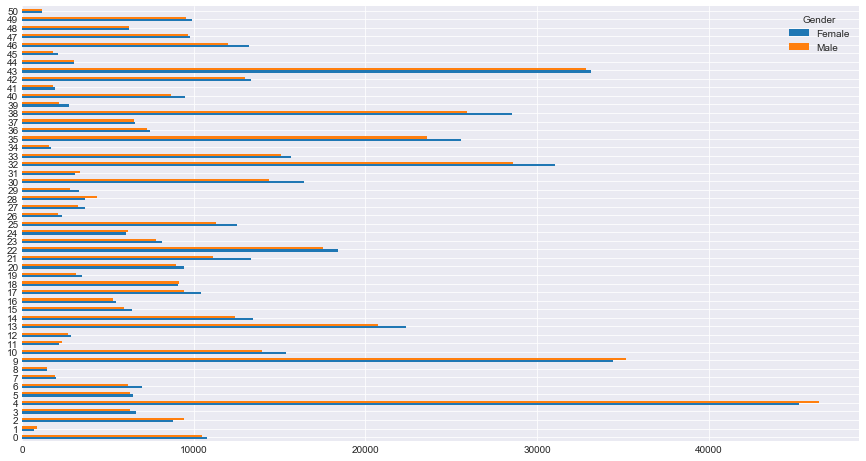

In [88]:
# Now let's make a sweet bar chart!!
pivot.plot(kind='barh', figsize=(15,8))

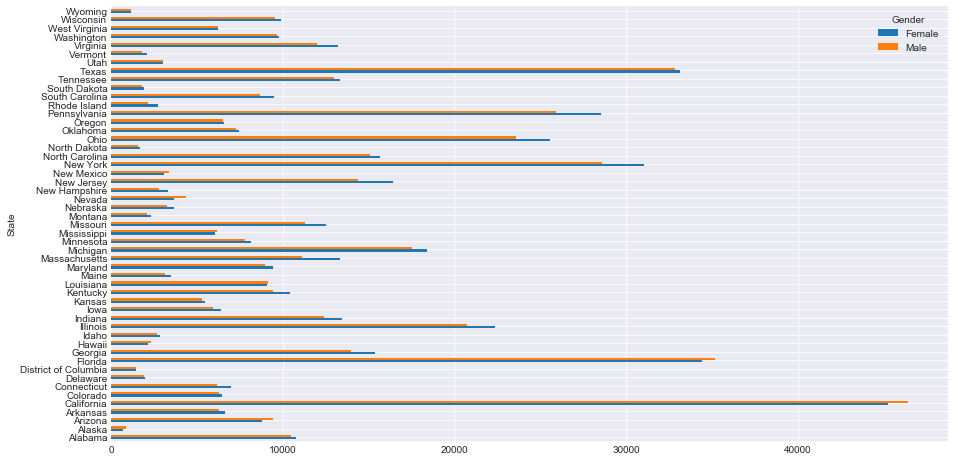

In [89]:
#Where's the states?! Notice the y-axis is just a list of numbers.
#This is populated by the DataFrame's index.
#When we used the .reset_index() method, we created a new numbered index to name each row. 
#Let's fix that by making state the index again.
pivot.set_index('State').plot(kind='barh', figsize=(15,8))

In [90]:
# Also notice that if we call the DataFrame pivot again, state is not it's index.
#The above method returned a DataFrame with State as index and we plotted it,
#but it did not update the DataFrame itself.
pivot.head(2)

Gender,State,Female,Male
0,Alabama,10753.325,10503.585366
1,Alaska,679.975,860.357143


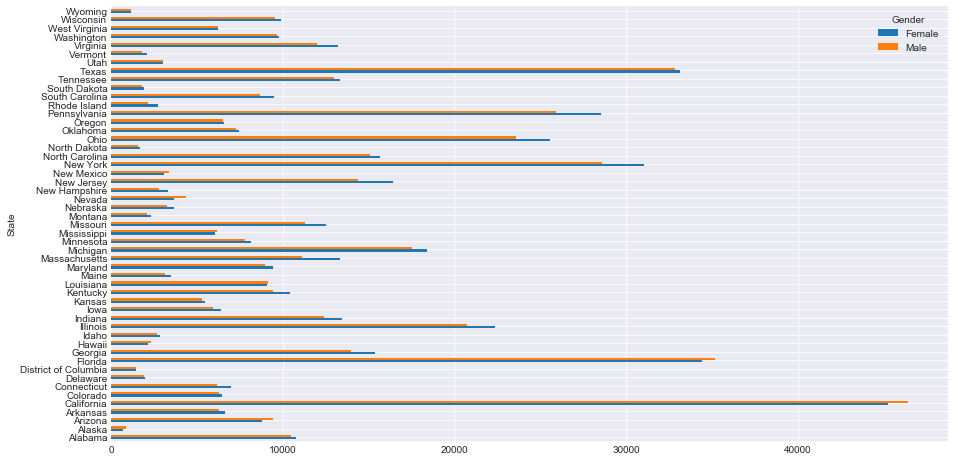

In [91]:
#If we wanted to more permanently change the index we would set it first and then plot:
pivot = pivot.set_index('State')
pivot.plot(kind='barh', figsize=(15,8))

In [92]:
pivot.head(2)

Gender,Female,Male
State,,
Alabama,10753.325,10503.585366
Alaska,679.975,860.357143


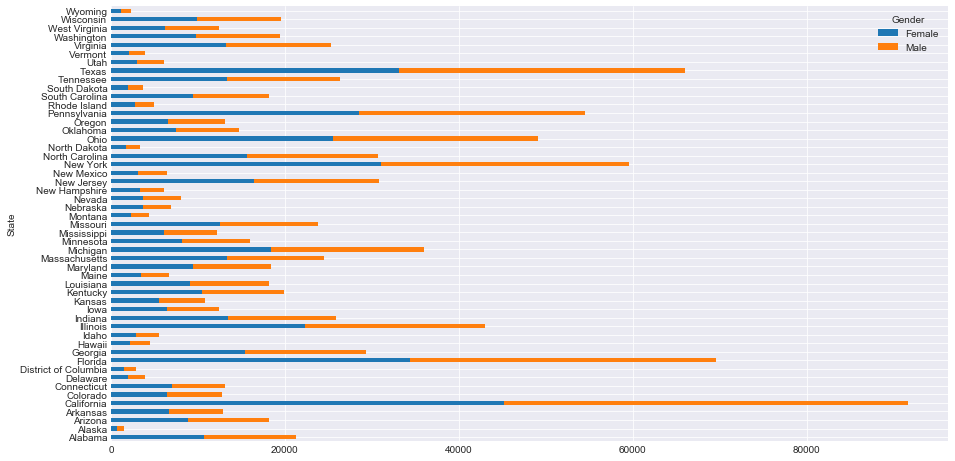

In [93]:
# Lastly, let's stack each of these bars for each state.
#Notice we don't have to worry about index here, because we've already set it above.
pivot.plot(kind='barh', figsize=(15,8), stacked=True)

# Excercises
# 6) Create a stacked bar chart of total population by gender/state.
        * Groupby gender/state
        * Pivot
        * Plot

In [ ]:
# Your code here

# 7) Create a stacked bar chart of population by race/gender.

In [ ]:
# Your code here

# 8) Sort one of your bar charts above by total bar height.

In [ ]:
# Your code here

# 9) Sort your second bar chart by a specific race's populatin rather then by total population

In [ ]:
# Your code here

# Box Plot Review

In [112]:
ny = df[df.State == 'New York']
ny.head(2)

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
2605,NaN,New York,36,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,33,23064,143.1
2606,NaN,New York,36,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,485,168826,287.3


In [113]:
ny['Age-Gender'] = ny['Ten-Year Age Groups'] + ny['Gender']
temp = ny.pivot(index='Age-Gender', columns='Race', values='Crude Rate')
temp.head(2)

/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Race,American Indian or Alaska Native,Asian or Pacific Islander,Black or African American,White
Age-Gender,,,,
1-4 yearsFemale,Unreliable,17.2,25.8,19.5
1-4 yearsMale,Unreliable,15.9,33.4,23.3


In [116]:
for col in temp.columns:
    n_unreliable = len(temp[temp[col]=='Unreliable'])
    print(col, n_unreliable, n_unreliable/len(temp), '\n')

American Indian or Alaska Native 4 0.16666666666666666 

Asian or Pacific Islander 0 0.0 

Black or African American 0 0.0 

White 0 0.0 



In [105]:
def force_float(val):
    try:
        val = float(val)
        return val
    except:
        return 0

In [107]:
for col in temp.columns:
    temp[col] = temp[col].map(force_float)
temp.head(2)

Race,American Indian or Alaska Native,Asian or Pacific Islander,Black or African American,White
Age-Gender,,,,
1-4 yearsFemale,0.0,17.2,25.8,19.5
1-4 yearsMale,0.0,15.9,33.4,23.3


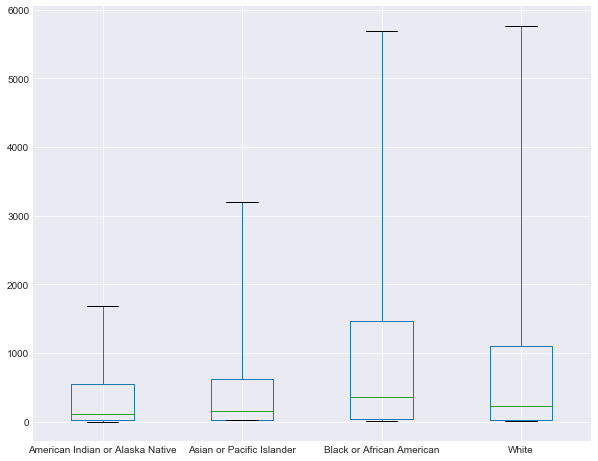

In [111]:
temp.plot.box(figsize=(10,8), whis=[5,95], showfliers=False)

# Create a Box Plot Comparing Crude Rates by Age

In [ ]:
#Your code here

In [126]:
temp = df[~df['Crude Rate'].isin(['Not Applicable', 'Unreliable'])]
temp['Crude Rate'] = temp['Crude Rate'].astype(float)
temp = temp.reset_index()
temp.head(2)

/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
1,2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0


In [128]:
by_age = temp.pivot(index='index', columns='Ten-Year Age Groups', values='Crude Rate')
by_age.head(2)

Ten-Year Age Groups,1-4 years,15-24 years,25-34 years,35-44 years,45-54 years,5-14 years,55-64 years,65-74 years,75-84 years,85+ years,< 1 year
index,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,322.5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1236.0


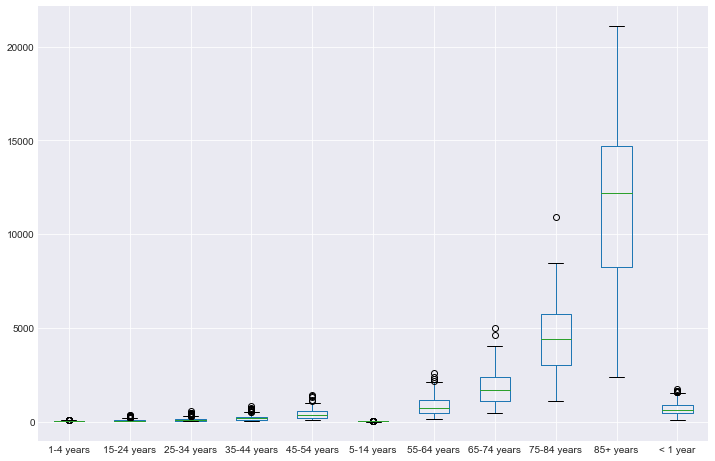

In [130]:
by_age.plot.box(figsize=(12,8))

# 10) Describe what this box plot shows.

In [ ]:
# Your description here

# Extension
Create at least 3 other interesting graphs that show something insightful about the data.

In [ ]:
#Your code here